E:\Dhanushka\Machine Learning Coursework\sales_forcast\src\utils\data_preprocessing.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_data['item_qty'].fillna(0, inplace=True)


,store,profile,size
0,ABC,Moderate,Medium
1,XYZ,High,Large


,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,2021-11-01,Grocery,1.0,160.0,XYZ,16620,1475459.0
1,2021-11-01,Grocery,2.0,480.0,XYZ,32365,1475459.0
2,2021-11-01,Grocery,1.0,127.0,XYZ,31349,1475459.0
3,2021-11-01,Household,2.0,110.0,XYZ,1266,1475475.0
4,2021-11-01,Household,1.0,150.0,XYZ,114920,1475475.0


,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,2022-02-01,Beverages,2.0,480.0,XYZ,112360,1495518.0
1,2022-02-01,Beverages,1.0,202.0,XYZ,111195,1495518.0
2,2022-02-01,Household,1.0,165.0,XYZ,41212,1495572.0
3,2022-02-01,Household,2.0,480.0,XYZ,123476,1495572.0
4,2022-02-01,Grocery,2.0,660.0,XYZ,106668,1495572.0


                             date_id       item_qty      net_sales  \
count                         612332  612332.000000  612332.000000   
mean   2021-12-16 16:26:09.266345472       1.534273     335.155858   
min              2021-11-01 00:00:00     -59.000000  -15250.000000   
25%              2021-11-25 00:00:00       1.000000     125.000000   
50%              2021-12-17 00:00:00       1.000000     215.000000   
75%              2022-01-08 00:00:00       1.698000     371.000000   
max              2022-01-31 00:00:00     880.000000  316880.280000   
std                              NaN       3.061869     825.643851   

                item   invoice_num  
count  612332.000000  5.909050e+05  
mean    67650.422302  4.231940e+06  
min       906.000000  1.475419e+06  
25%     14345.000000  2.581948e+06  
50%     89893.000000  4.597865e+06  
75%    117021.000000  5.598286e+06  
max    124146.000000  9.354809e+06  
std     48901.214022  1.704193e+06  
date_id            0
item_dept      

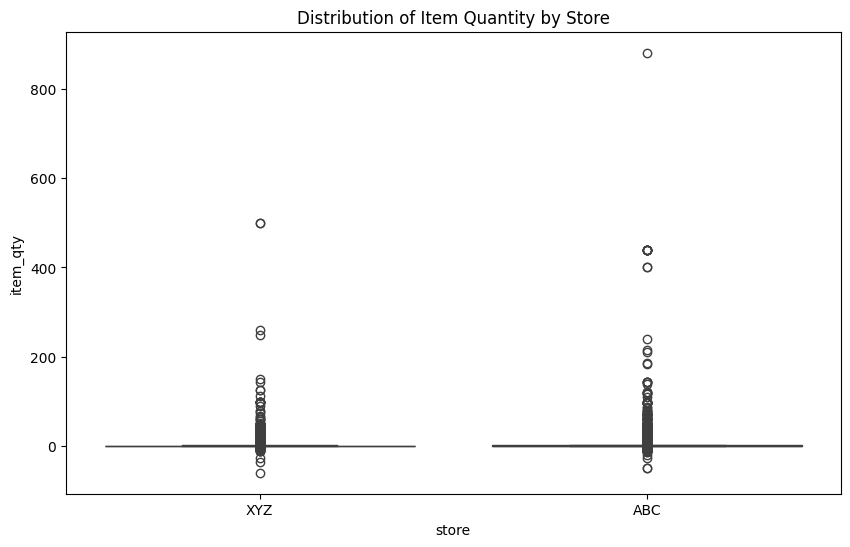

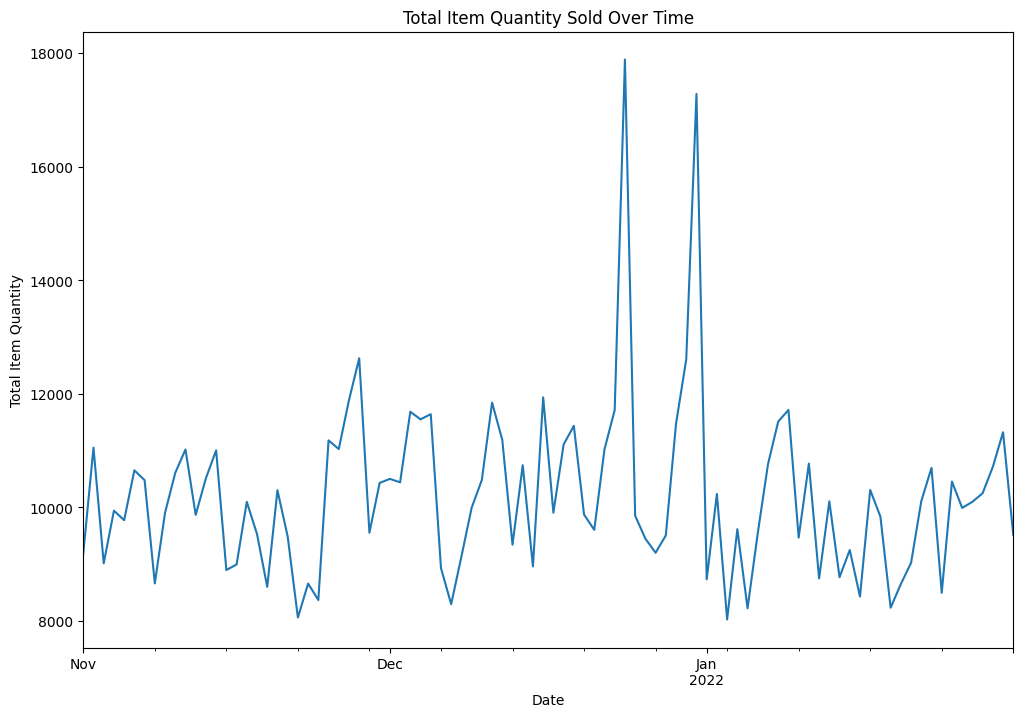

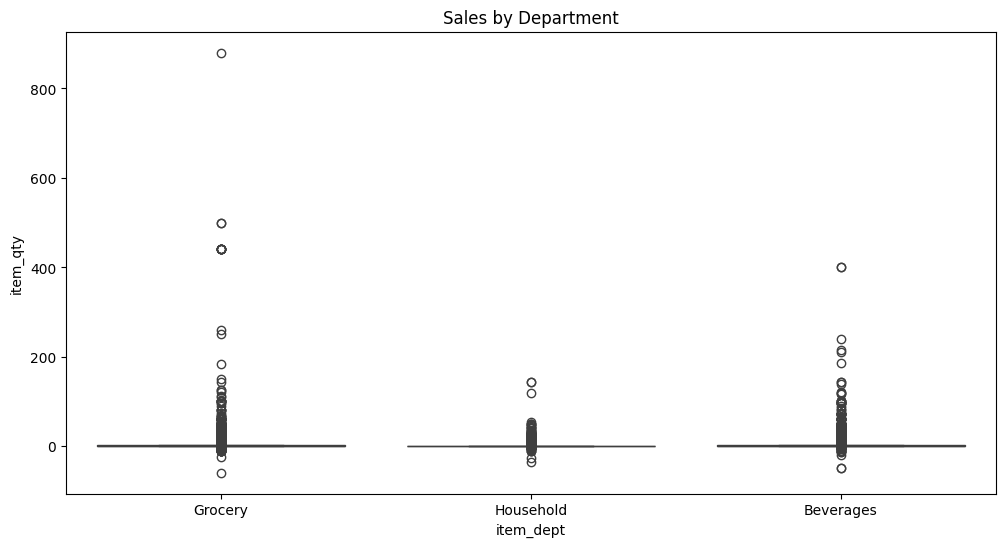

<Figure size 1400x700 with 0 Axes>

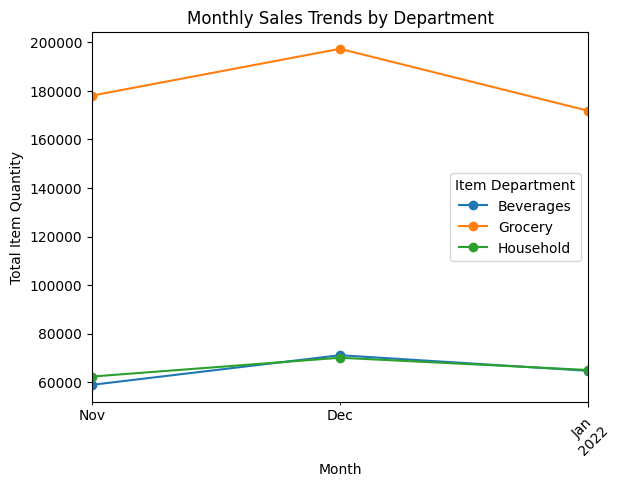

Summary of Descriptive Analysis:
- XYZ has higher sales in comparison to ABC, which might be due to its larger size and high profile.
- Grocery department appears to have more consistent sales across months.
- There are visible seasonal trends in sales, with possible spikes during certain months (e.g., November).


In [1]:
# analysis/exploratory_analysis.ipynb
import sys
import os

# Get the project root directory (one level up from the current directory)
project_root = os.path.abspath("..")

# Add the project root directory to the Python path
if project_root not in sys.path:
    sys.path.append(project_root)
    
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from src.utils.data_loader import load_data
#from src.utils.data_preprocessing import clean_data
# Now, you can import from src.utils
from src.utils.data_loader import load_data
from src.utils.data_preprocessing import clean_data

# Load the data
outlet_info_path = '../data/outlet_info.csv'
training_data_path = '../data/cleaned_training_data.csv'
test_data_path = '../data/cleaned_test_data.csv'

outlet_info, training_data, test_data = load_data(outlet_info_path, training_data_path, test_data_path)

# Clean the training data
training_data = clean_data(training_data)

# Display the first few rows of each dataset
display(outlet_info.head())
display(training_data.head())
display(test_data.head())

# Summary statistics of the training data
print(training_data.describe())

# Check for missing values
print(training_data.isnull().sum())

# Visualizing the data
## Distribution of item_qty by store
plt.figure(figsize=(10, 6))
sns.boxplot(x='store', y='item_qty', data=training_data)
plt.title('Distribution of Item Quantity by Store')
plt.show()

## Sales trends over time
plt.figure(figsize=(12, 8))
training_data.groupby('date_id')['item_qty'].sum().plot()
plt.title('Total Item Quantity Sold Over Time')
plt.ylabel('Total Item Quantity')
plt.xlabel('Date')
plt.show()

## Sales by Department
plt.figure(figsize=(12, 6))
sns.boxplot(x='item_dept', y='item_qty', data=training_data)
plt.title('Sales by Department')
plt.show()

# Investigate seasonality (monthly trends)
training_data['month'] = training_data['date_id'].dt.to_period('M')
monthly_sales = training_data.groupby(['month', 'item_dept'])['item_qty'].sum().unstack()

plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends by Department')
plt.ylabel('Total Item Quantity')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Item Department')
plt.show()

# Summary of findings
print("Summary of Descriptive Analysis:")
print("- XYZ has higher sales in comparison to ABC, which might be due to its larger size and high profile.")
print("- Grocery department appears to have more consistent sales across months.")
print("- There are visible seasonal trends in sales, with possible spikes during certain months (e.g., November).")
